# Pattern Recognition | Classification, Clustering & Dimensionality Reduction

---

The purpose of this exercise is to explore and compare several classic Machine Learning (ML) methods such as classification (supervised), clustering (unsupervized) and dimensionality reduction for Face Recognition & Data Visualization. 

<br>

The script focuses on Knn (Home-made & Sklearn) as this is a tool we particularly used at Imperial College for our classification problems, however other classification methods are also tested and prove to be further succesful in classifying the images (92.3% accuracy with Logistic Regression).

Clustering is also experimented to see if there are any undelying similarities between pictures of a same person/class. In this case, I am just using the raw picture pixels as features and therefore clustering does not perform incredibly well; however, clustering could be an interesting tool if we extracted specific discriminating features from the pictures (example: distance between eyes, eye colour, lip size, etc). 

---

Classification (Sklearn & Home-made)

- K nearest neighbour (Knn)
    - Explored in more detail (Home-made) for learning & visualization purposes
- Support Vector Machine (SVM)
- Random Forest
- Logistic Regression 
    - Best Results

<br>

Clustering (Sklearn): 

- Kmeans 
  - Hungarian method (Label Assignement)

<br>

Dimensionality Reduction (Sklearn & Home-made): 

- PCA 
- Low-Dimensional PCA 

---

Data Set : 
- Original Set: 520 face images of 52 people (10 images per person/class)
- Histogram Set: Distribution of Pixel Intensities
- Equalized Set: Modified Original Set 

Equalization: Image processing method for contrast adjustment using the image's histogram.

---

---

# Import Libraries

In [40]:
import scipy.io as sio  # Load data .mat file
import matplotlib.pyplot as plt  # Data viz
import numpy as np

import cv2
import timeit
import os

# Scikit-learn for ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut

In [46]:
# Save Figures Path

fig_res = 'Figures Results'
fig_viz = 'Figures Visualization'

if not os.path.exists(fig_results):
    os.makedirs(fig_results)
    
if not os.path.exists(fig_viz):
    os.makedirs(fig_viz)

---

# Functions

In [3]:
def get_equ(data):
    data_equ = np.zeros((data.shape[0], data.shape[1]))

    for i in range(data.shape[0]):
        img = data[i, :]
        data_equ[i, :] = cv2.equalizeHist(img)[:, 0]
    
    return data_equ

In [4]:
def get_hist(data, b):
    data_hist = np.zeros((data.shape[0], b))

    for i in range(data.shape[0]):
        data_hist[i, :] = np.histogram(data[i, :], bins=b, range=(0, 255))[0] 
    
    return data_hist

---

---

# Load Data

In [5]:
# Set of 52 people with 10 pictures per person, so a total of 520 faces

mat_content = sio.loadmat('face.mat')

face_data = mat_content['X']
l = mat_content['l']

print('\nDimensions of Raw Data Set:', face_data.shape, '\n')


Dimensions of Raw Data Set: (2576, 520) 



---

# ML | Split in Train & Test 

### Original Set

In [6]:
# Partition data in Training & Testing data (4:1 ratio, 8 test for every 2 train per person/class)

X_train = face_data[:, [x for x in range(len(face_data[0,:])) if x%10 != 8 and x%10 != 9]].T
y_train = np.ravel( l[:, [x for x in range(len(l[0,:])) if x%10 != 8 and x%10 != 9]] ) # 1D Array

X_test = face_data[:, [x for x in range(len(face_data[0,:])) if x%10 == 8 or x%10 == 9]].T
y_test = np.ravel( l[:, [x for x in range(len(l[0,:])) if x%10 == 8 or x%10 == 9]] )

M_range = X_train.shape[0] # Num of Train data points

print('\nDimensions of Original Train & Test Sets:')
print('\n  Train: ', X_train.shape)
print('  Test:  ', X_test.shape, '\n')


Dimensions of Original Train & Test Sets:

  Train:  (416, 2576)
  Test:   (104, 2576) 



### Histogram Set

In [7]:
# Histogram of Pixel Intensity : Get an idea of the distribution of pixel intensities in each image/face

b = 15

X_train_hist = get_hist(X_train, b)
X_test_hist = get_hist(X_test, b) 

print('\nDimensions of Histogram Train & Test Sets:')
print('\n  Train: ', X_train_hist.shape)
print('  Test:  ', X_test_hist.shape, '\n')


Dimensions of Histogram Train & Test Sets:

  Train:  (416, 15)
  Test:   (104, 15) 



### Visualize Original & Histogram Set

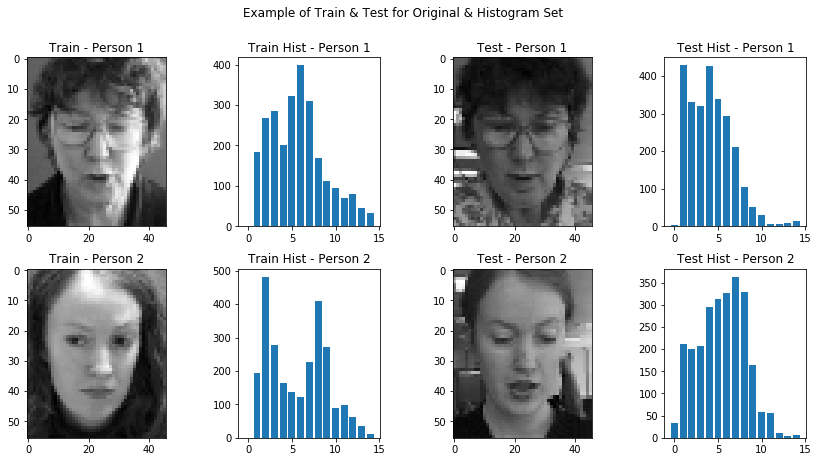

In [44]:
# Examples from Training and Test datasets (same person)

ex_person = [0, 1] 

fig, axs = plt.subplots(2, 4, figsize = (14, 7))

axs[0, 0].imshow(np.reshape(X_train[8 * ex_person[0], :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 0].set_title('\nTrain - Person '+ str( int(ex_person[0])+1 ))

axs[0, 1].bar(range(len(X_train_hist[8 * ex_person[0], :])), X_train_hist[8 * ex_person[0], :])
axs[0, 1].set_title('\nTrain Hist - Person '+ str( int(ex_person[0])+1 ))

axs[0, 2].imshow(np.reshape(X_test[2 * ex_person[0], :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 2].set_title('\nTest - Person '+ str( int(ex_person[0])+1 ))

axs[0, 3].bar(range(len(X_test_hist[2 * ex_person[0], :])), X_test_hist[2 * ex_person[0], :])
axs[0, 3].set_title('\nTest Hist - Person '+ str( int(ex_person[0])+1 ))


axs[1, 0].imshow(np.reshape(X_train[8 * ex_person[1], :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 0].set_title('\nTrain - Person '+ str( int(ex_person[1])+1 ))

axs[1, 1].bar(range(len(X_train_hist[8 * ex_person[1], :])), X_train_hist[8 * ex_person[1], :])
axs[1, 1].set_title('\nTrain Hist - Person '+ str( int(ex_person[1])+1 ))

axs[1, 2].imshow(np.reshape(X_test[2 * ex_person[1], :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 2].set_title('\nTest - Person '+ str( int(ex_person[1])+1 ))

axs[1, 3].bar(range(len(X_test_hist[2 * ex_person[1], :])), X_test_hist[2 * ex_person[1], :])
axs[1, 3].set_title('\nTest Hist - Person '+ str( int(ex_person[1])+1 ))

plt.suptitle('Example of Train & Test for Original & Histogram Set')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.25)

plt.savefig(fig_viz + '//Original & Histogram Set.png', dpi=100)
plt.show()

<br>

Histograms seem like a poor feature representation in this case (will confirm with ML analysis), as differences in contrast among pictures do not allow us to describe each person distinctly with pixel intensity (Good examples here). It would be interesting to adjust for these high differences in contrast by equalizing (histogram equalization) the Original Set of pictures.

### Equalized Set

In [9]:
# Equalized Set of Images : Adjust contrast between images for better comparison

X_train_equ = get_equ(X_train)
X_test_equ = get_equ(X_test)

print('\nDimensions of Equalized Train & Test Sets:')
print('\n  Train: ', X_train_equ.shape)
print('  Test:  ', X_test_equ.shape, '\n')


Dimensions of Equalized Train & Test Sets:

  Train:  (416, 2576)
  Test:   (104, 2576) 



### Visualize Original & Equalized Set

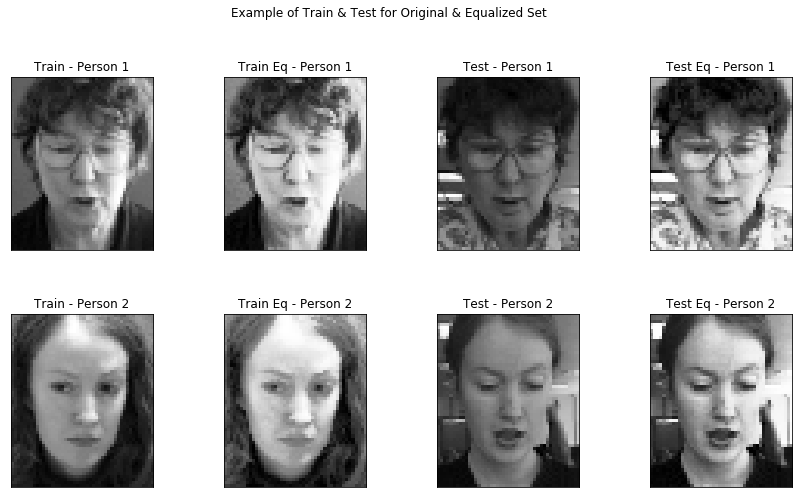

In [45]:
# Examples from Training and Test datasets (same person)

ex_person = [0, 1] 

fig, axs = plt.subplots(2, 4, figsize = (14, 8), subplot_kw={'xticks': [], 'yticks': []})

axs[0, 0].imshow(np.reshape(X_train[8 * ex_person[0], :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 0].set_title('\nTrain - Person '+ str( int(ex_person[0])+1 ))

axs[0, 1].imshow(np.reshape(X_train_equ[8 * ex_person[0], :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 1].set_title('\nTrain Eq - Person '+ str( int(ex_person[0])+1 ))

axs[0, 2].imshow(np.reshape(X_test[2 * ex_person[0], :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 2].set_title('\nTest - Person '+ str( int(ex_person[0])+1 ))

axs[0, 3].imshow(np.reshape(X_test_equ[2 * ex_person[0], :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 3].set_title('\nTest Eq - Person '+ str( int(ex_person[0])+1 ))


axs[1, 0].imshow(np.reshape(X_train[8 * ex_person[1], :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 0].set_title('\nTrain - Person '+ str( int(ex_person[1])+1 ))

axs[1, 1].imshow(np.reshape(X_train_equ[8 * ex_person[1], :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 1].set_title('\nTrain Eq - Person '+ str( int(ex_person[1])+1 ))

axs[1, 2].imshow(np.reshape(X_test[2 * ex_person[1], :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 2].set_title('\nTest - Person '+ str( int(ex_person[1])+1 ))

axs[1, 3].imshow(np.reshape(X_test_equ[2 * ex_person[1], :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 3].set_title('\nTest Eq - Person '+ str( int(ex_person[1])+1 ))

plt.suptitle('Example of Train & Test for Original & Equalized Set')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

plt.savefig(fig_viz + '//Original & Equalized Set.png', dpi=100)
plt.show()

<br>

We can see that the Equalized Set now partly corrects the contrast issues, which will make it easier to compare images.

---

---

# ML | Knn Classification

## Train/Test split

### Knn (k=1) classification | All sets

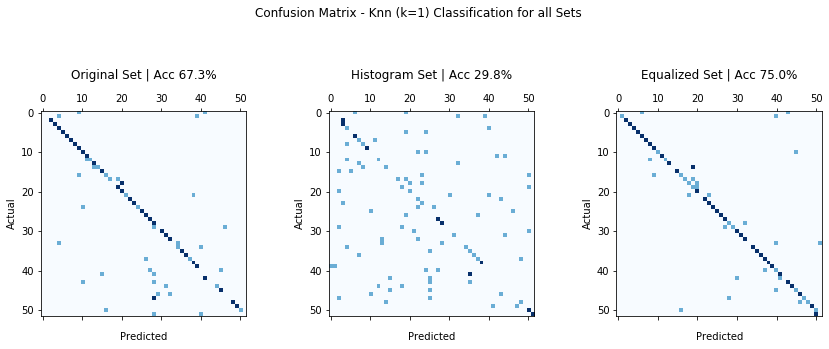

In [56]:
# Knn classification with 0.2 test split (equal class representation)

# Original set of Images
nn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
nn.fit(X_train, y_train)
pred_label = nn.predict(X_test)

acc_ori = np.round(100*np.mean(pred_label == y_test), 1)


# Histogram set of Images
nn_hist = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
nn_hist.fit(X_train_hist, y_train)
pred_label_hist = nn_hist.predict(X_test_hist)

acc_hist = np.round(100*np.mean(pred_label_hist == y_test), 1)


# Equalized set of Images
nn_equ = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
nn_equ.fit(X_train_equ, y_train)
pred_label_equ = nn_equ.predict(X_test_equ)

acc_equ = np.round(100*np.mean(pred_label_equ == y_test), 1)



# Confusion Matrix

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

ax1.matshow(confusion_matrix(y_test, pred_label), cmap = 'Blues')
ax1.set_ylabel('Actual')
ax1.set_xlabel('\nPredicted')
ax1.set_title('Original Set | Acc ' + str(acc_ori) + '%\n')

ax2.matshow(confusion_matrix(y_test, pred_label_hist), cmap = 'Blues')
ax2.set_ylabel('Actual')
ax2.set_xlabel('\nPredicted')
ax2.set_title('Histogram Set | Acc ' + str(acc_hist) + '%\n')

ax3.matshow(confusion_matrix(y_test, pred_label_equ), cmap = 'Blues')
ax3.set_ylabel('Actual')
ax3.set_xlabel('\nPredicted')
ax3.set_title('Equalized Set | Acc ' + str(acc_equ) + '%\n')


plt.suptitle('Confusion Matrix - Knn (k=1) Classification for all Sets')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

plt.savefig(fig_res + '//Confusion Matrix Knn.png', dpi=100)
plt.show()

<br>

Overall, results are impressively high for simple pixel image comparison with knn, reaching 67%. As our intuition forecasted, correcting for disparities in contrast improves image comparison quite significantly.

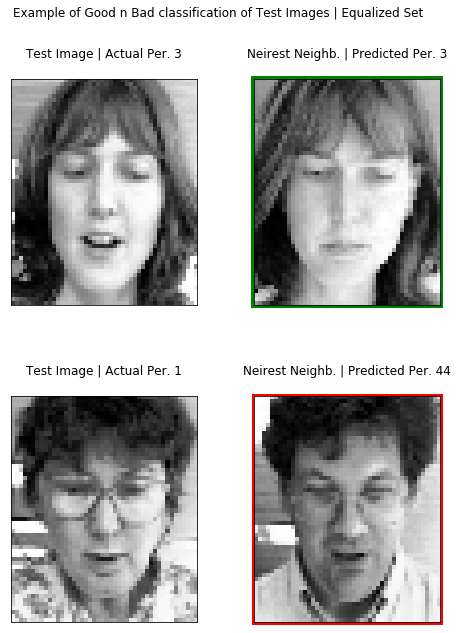

In [67]:
# Example of correctly and badly classified test points

ex_pred_labels = pred_label_equ[:6]
ex_nn_loc = nn_equ.kneighbors(X_test_equ[:6, :])[1]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 10), subplot_kw={'xticks': [], 'yticks': []})

axs[0, 0].imshow(np.reshape(X_test_equ[4, :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 0].set_title('Test Image | Actual Per. ' + str(3) + '\n')

axs[0, 1].imshow(np.reshape(X_train_equ[ex_nn_loc[4], :],(46, 56)).T, cmap = 'gist_gray')
axs[0, 1].set_title('Neirest Neighb. | Predicted Per. ' + str(int( (ex_nn_loc[4]/8)+1 )) + '\n')
axs[0, 1].patch.set_edgecolor('green')  
axs[0, 1].patch.set_linewidth('6')  

axs[1, 0].imshow(np.reshape(X_test_equ[0, :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 0].set_title('Test Image | Actual Per. ' + str(1) + '\n')

axs[1, 1].imshow(np.reshape(X_train_equ[ex_nn_loc[0], :],(46, 56)).T, cmap = 'gist_gray')
axs[1, 1].set_title('Neirest Neighb. | Predicted Per. ' + str(int( (ex_nn_loc[0]/8)+1 )) + '\n')
axs[1, 1].patch.set_edgecolor('red')  
axs[1, 1].patch.set_linewidth('5')  


plt.suptitle('Example of Good n Bad classification of Test Images | Equalized Set')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.savefig(fig_viz + '//Knn Good & Bad Classification.png', dpi=100)
plt.show()

### Knn Accuracy Vs K | Equalized Set

The Equalized Set gives the best results out of the three sets, and it would be interesting to iteratate through k for more details.

In [13]:
acc_k = []

print('\nKnn on Equalized set\n')
print('  Iteration through k:\n')
for k in range(1, 150):
    # Equalized set of Images
    knn_equ = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn_equ.fit(X_train_equ, y_train)
    pred_label_equ = knn_equ.predict(X_test_equ)

    acc_equ = np.round(np.mean(pred_label_equ == y_test), 3)
    acc_k.append(acc_equ)
    
    if k%25 == 0:
        print('  ', k)


Knn on Equalized set

  Iteration through k:

   25
   50
   75
   100
   125


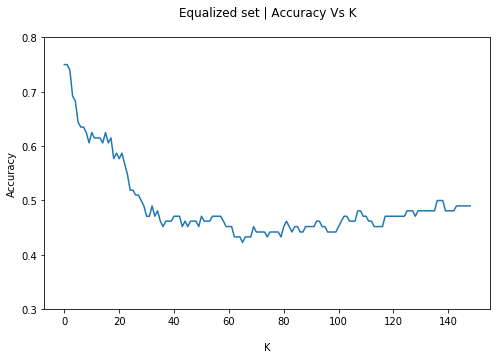

In [50]:
fig = plt.figure(figsize=(8, 5))

plt.plot(acc_k)
plt.title('Equalized set | Accuracy Vs K\n')
plt.xlabel('\nK')
plt.ylabel('Accuracy')
plt.ylim([0.3, 0.8])

plt.savefig(fig_res + '//Knn Accuracy Vs k Equalized Set.png', dpi=100)
plt.show()

---

## Leave One Out Cross-Validation (LOOCV)

### Knn (k=[1,10]) classification | Equalized Set

In [15]:
X = get_equ(face_data.T)
y = np.ravel(l)

loo = LeaveOneOut()
loo.get_n_splits(X)

k_loocv = [1, 10]


for k in k_loocv:
    acc_loocv = []
    
    print('\nStart knn LOOCV:', k)
    for train_index, test_index in loo.split(X):
        X_train_LOOCV, X_test_LOOCV = X[train_index], X[test_index]
        y_train_LOOCV, y_test_LOOCV = y[train_index], y[test_index]

        knn_loocv = KNeighborsClassifier(n_neighbors = k, weights = 'distance') # Bad practice to fit a model for each Leave One Out Data point, makes it very slow
        knn_loocv.fit(X_train_LOOCV, y_train_LOOCV)
        acc_loocv.append(knn_loocv.score(X_test_LOOCV, y_test_LOOCV))

    print('\n  Accuracy:', np.round(np.mean(acc_loocv), 3), '\n')


Start knn LOOCV: 1

  Accuracy: 0.712 


Start knn LOOCV: 10

  Accuracy: 0.569 



---

---

# ML | Several Classification Algorithms

In [52]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import plot_confusion_matrix

In [65]:
classifiers = [KNeighborsClassifier(n_neighbors = 1, weights = 'distance'),
               SVC(),
               RandomForestClassifier(), 
               LogisticRegression(solver='lbfgs')]

acc = []
pred_label = []

print('\nClassifying:\n')
for cls in classifiers:
    print('  ', cls)
    cls.fit(X_train_equ, y_train)
    pred_label.append(cls.predict(X_test_equ))
    acc.append(100*np.round(cls.score(X_test_equ, y_test), 3))
    
acc = np.round(acc, 3)
pred_label = np.array(pred_label)


Classifying:

   KNeighborsClassifier(n_neighbors=1, weights='distance')
   SVC()
   RandomForestClassifier()
   LogisticRegression()


C:\Users\court\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


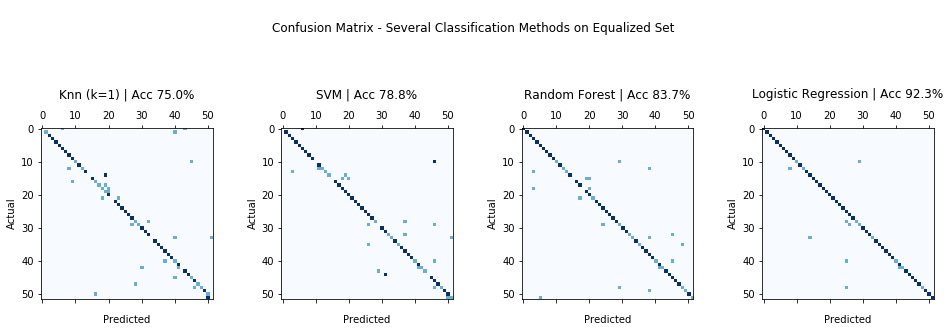

In [66]:
# Confusion Matrix

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

ax1.matshow(confusion_matrix(y_test, pred_label[0]), cmap = 'Blues')
ax1.set_ylabel('Actual')
ax1.set_xlabel('\nPredicted')
ax1.set_title('Knn (k=1) | Acc ' + str(acc[0]) + '%\n')

ax2.matshow(confusion_matrix(y_test, pred_label[1]), cmap = 'Blues')
ax2.set_ylabel('Actual')
ax2.set_xlabel('\nPredicted')
ax2.set_title('SVM | Acc ' + str(acc[1]) + '%\n')

ax3.matshow(confusion_matrix(y_test, pred_label[2]), cmap = 'Blues')
ax3.set_ylabel('Actual')
ax3.set_xlabel('\nPredicted')
ax3.set_title('Random Forest | Acc ' + str(acc[2]) + '%\n')

ax4.matshow(confusion_matrix(y_test, pred_label[3]), cmap = 'Blues')
ax4.set_ylabel('Actual')
ax4.set_xlabel('\nPredicted')
ax4.set_title('Logistic Regression | Acc ' + str(acc[3]) + '%\n')


plt.suptitle('\nConfusion Matrix - Several Classification Methods on Equalized Set')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

plt.savefig(fig_res + '//Confusion Matrix Several Classification Methods.png', dpi=100)
plt.show()

---

---

# ML | Dimensionality Reduction (PCA)

## PCA | Home-made

PCA transformation steps:

- Standardize DataSet (Compute average and subtract)
- Compute Covariance Matrix S
- Compute EigenValues (Principle Components) & EigenVectors (Eigenfaces) of S 
- Sort Eigenvalues & Eigenvectors

---

### PCA Classic 

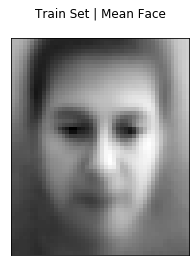

In [57]:
# Compute Average face
avg_X_train = np.mean(X_train_equ, axis = 0)

# Plot X_train Average Face
plt.imshow(np.reshape(avg_X_train, (46, 56)).T, cmap = 'gist_gray')
plt.title('Train Set | Mean Face\n'), plt.xticks([]), plt.yticks([])

plt.savefig(fig_viz + '//Average Face.png', dpi=100)
plt.show()

In [20]:
# Compute Covariance Matrix S

A = X_train_equ.T - np.array([avg_X_train]).T
N = A.shape[1]

S = (1/N)*(A @ A.T)


# Compute EigenValues and EigenVectors of S (Check computing time)
start = timeit.default_timer()
eigvals, eigvecs = np.linalg.eig(S)      
stop = timeit.default_timer()

print('\nTime for classic PCA:', np.round(stop - start, 2), 's\n')


Time for classic PCA: 15.96 s



---

### PCA Low-Dimensional

In [21]:
# Compute EigenValues and EigenVectors of S (Check computing time Vs Classic PCA)

start = timeit.default_timer()

eigvals_low, eigvecs_low = np.linalg.eig(A.T @ A)

# Normalise low Diemensional Eigenvectors
eigvecs_low_norm = (A @ eigvecs_low) / np.linalg.norm(A @ eigvecs_low, 2, 0)
      
stop = timeit.default_timer()

print('\nTime for Low-Dimensional PCA: ', np.round(stop - start, 2), 's\n')


Time for Low-Dimensional PCA:  3.41 s



---

### PCA Classic Vs Low

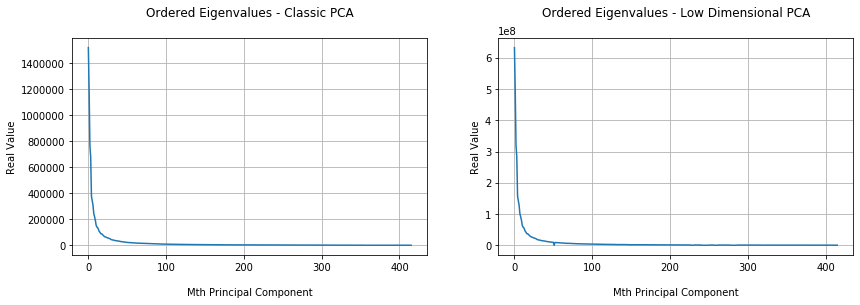

In [22]:
# Plot EigenValues - Classic Vs Low Dimensional PCA

fig, axs = plt.subplots(1, 2, figsize = (14, 4))

eigvals_fixed = np.array([eigvals]).T

axs[0].plot(eigvals[:416].real)
axs[0].set_xlabel('\nMth Principal Component')
axs[0].set_ylabel('Real Value')
axs[0].set_title('Ordered Eigenvalues - Classic PCA\n')
axs[0].grid()


eigvals_low_fixed = np.array([eigvals_low]).T

axs[1].plot(eigvals_low[:416].real)
axs[1].set_xlabel('\nMth Principal Component')
axs[1].set_ylabel('Real Value')
axs[1].set_title('Ordered Eigenvalues - Low Dimensional PCA\n')
axs[1].grid()


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

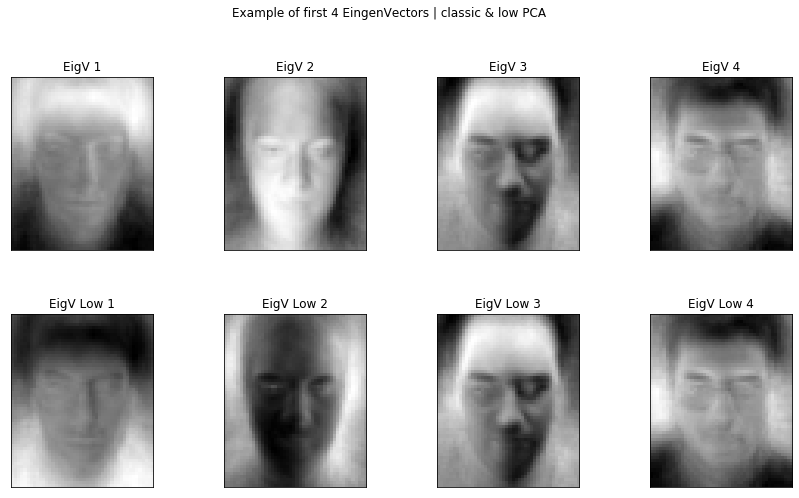

In [58]:
# Example of Eigenvectors for Classic & Low dimensional PCA (First four, stastically most discriminant dimensions)

eigvec_n = [0, 1, 2, 3]

f = plt.figure(figsize=(14,8))

for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(np.reshape(eigvecs[:, eigvec_n[i]].real,(46,56)).T, cmap = 'gist_gray')
    plt.title('EigV ' + str(i+1)), plt.xticks([]), plt.yticks([])
    
for i in range(4):
    plt.subplot(2, 4, i+1+4)
    plt.imshow(np.reshape(eigvecs_low_norm[:, eigvec_n[i]].real,(46,56)).T, cmap = 'gist_gray')
    plt.title('EigV Low ' + str(i+1)), plt.xticks([]), plt.yticks([])

plt.suptitle('Example of first 4 EingenVectors | classic & low PCA')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)

plt.savefig(fig_viz + '//EigenFaces.png', dpi=100)
plt.show()

---

### PCA (Low) Reconstruction

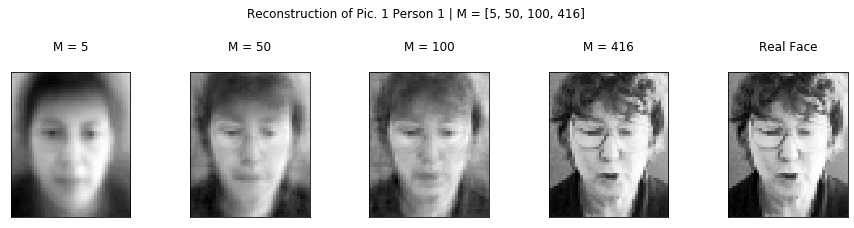

In [59]:
# Image Reconstruction from Low PCA

person = 0
rec_M = [5, 50, 100, 416]

f = plt.figure(figsize=(15,4))

i = 0
for m in rec_M:
    i += 1
    
    w_person_low = A[:, 8*person].T @ eigvecs_low_norm[:,:m]
    weighted_vector_sum_low = np.array([np.sum((w_person_low * eigvecs_low_norm[:,:m]), axis = 1)]).T
    rec = np.array([avg_X_train]).T + weighted_vector_sum_low
    
    plt.subplot(1,5,i)
    plt.imshow(np.reshape(rec.real,(46,56)).T, cmap = 'gist_gray')
    plt.title('M = ' + str(m) + '\n'), plt.xticks([]), plt.yticks([])
    
plt.subplot(155)
plt.imshow(np.reshape(X_train_equ[8*person, :].real,(46,56)).T, cmap = 'gist_gray')
plt.title('Real Face\n'), plt.xticks([]), plt.yticks([])

plt.suptitle('Reconstruction of Pic. 1 Person ' + str(person+1) + ' | M = ' + str(rec_M))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

plt.savefig(fig_viz + '//PCA Image Reconstruction.png', dpi=100)
plt.show()

---

## PCA & Knn | Home-made Vs Scikit-learn library

A comparison between the home-made PCA & knn and the scikit-learn pre-built modules

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [26]:
# Standard Scalar Normalization (mean 0, std 1)

sc = StandardScaler()

X_train_SKpca = sc.fit_transform(X_train_equ)
X_test_SKpca = sc.transform(X_test_equ)

pca = PCA()

X_train_SKpca = pca.fit_transform(X_train_SKpca)
X_test_SKpca = pca.transform(X_test_SKpca)

explained_variance = pca.explained_variance_ratio_


# Cumulative Explained Variance Vs M

cumulative_variance = []
cumulative_variance_Skpca = []

for m in range(eigvals.shape[0]):
    cumulative_variance_Skpca.append(sum(explained_variance[:(m+1)]*100))
    cumulative_variance.append((sum(eigvals[:(m+1)]*100)/sum(eigvals)).real)

### Knn (k=1) Vs M (Principle Components) | Sklearn

In [27]:
# Knn (k=1) classification Vs M (Sklearn) - See results on Graph below

acc_Skpca = []

for i in range(1, X_train_SKpca.shape[0] + 1):

    pca = PCA(n_components = i)

    X_train_SKpca_tranformed = pca.fit_transform(X_train_SKpca)
    X_test_SKpca_tranformed = pca.transform(X_test_SKpca)

    # Knn classification
    nn_SKpca = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
    nn_SKpca.fit(X_train_SKpca_tranformed, y_train)

    pred_label_Skpca = nn_SKpca.predict(X_test_SKpca_tranformed)
    
    acc_Skpca.append(100*np.round(np.mean(pred_label_Skpca == y_test), 2))

### Knn (k=1) Vs M (Principle Components) | Home-made

In [28]:
# Knn classification on Low Dimensional PCA transformed set (k=1)

N_test = X_test_equ.shape[0]

acc_Hmpca =[]
recognition_success = np.zeros(N_test)

A_test = X_test.T - np.array([avg_X_train]).T
w_train_low = A.T @ eigvecs_low_norm

for m in range(M_range):
    
    w_test_low = A_test.T @ eigvecs_low_norm[:,:(m+1)]

    for n_test in range(N_test):
        
        e = np.linalg.norm(w_train_low[:,:(m+1)] - w_test_low[n_test,:], 2, 1) # Computes Euclidian distance between n_test and each train image (vector len 416)
        e_n = min(e) # Takes in min distance
        n = np.where(e == e_n) # Takes in min distance location (k = 1)

        if int(n[0]/8) == int(n_test/2):
            recognition_success[n_test] = 1
        else:
            recognition_success[n_test] = 0

    acc_Hmpca.append(sum(recognition_success)*100/N_test)

### Home-made Vs Sklearn

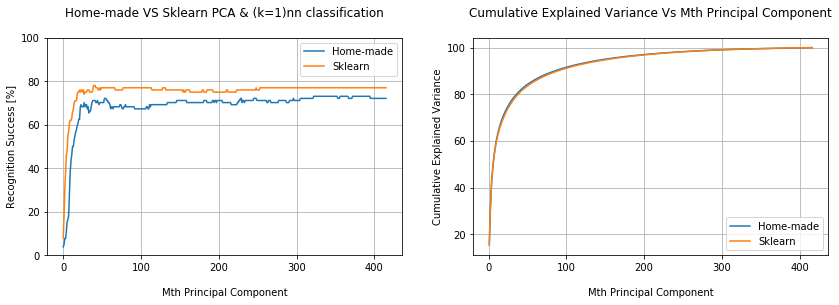

In [60]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))

axs[0].plot(acc_Hmpca, label = 'Home-made')
axs[0].plot(acc_Skpca, label = 'Sklearn')
axs[0].legend()
# axes = plt.gca()
axs[0].set_ylim([0,100])
axs[0].set_ylabel('Recognition Success [%]')
axs[0].set_xlabel('\nMth Principal Component')
axs[0].set_title('Home-made VS Sklearn PCA & (k=1)nn classification\n')
axs[0].grid()

axs[1].plot(range(1, 417), cumulative_variance[:416], label = 'Home-made')
axs[1].plot(range(1, 417), cumulative_variance_Skpca[:416], label = 'Sklearn')
axs[1].legend()
axs[1].set_xlabel('\nMth Principal Component')
axs[1].set_ylabel('Cumulative Explained Variance')
axs[1].set_title('Cumulative Explained Variance Vs Mth Principal Component\n')
axs[1].grid()

plt.savefig(fig_res + '//Knn & PCA Home-made Vs Sklearn.png', dpi=100)
plt.show()

---

---

# ML | Kmeans Clustering & Hungarian Algorithm

In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix

from munkres import Munkres

In [38]:
X = get_equ(face_data.T)
y = np.ravel(l)

acc_kmean = []
acc_clusters_kmean = []
iterations = 10


for n_cluster in [52]:
    for it in range(iterations):
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(X)
        
        # Confusion Matrix before Label Assignement
        if it == 0:
            cm_before_hung = confusion_matrix(y, kmeans.labels_+1)
            cm_norm_before_hung = cm_before_hung.astype('float') / cm_before_hung.sum(axis=1)[:, np.newaxis]
            acc_before_hung = (sum(y == kmeans.labels_+1)*100)/len(y == kmeans.labels_+1)


        # Hungarian Algorithm: Assign labels to kmean clusters
        m = Munkres()
        contmat = contingency_matrix(y, kmeans.labels_)
        assignements_kmeans = m.compute(contmat.max() - contmat)


        # 
        for i in range(len(kmeans.labels_)):
            already_done = 0
            for j in range(len(assignements_kmeans)):
                if kmeans.labels_[i] == assignements_kmeans[j][1] and already_done == 0:
                    kmeans.labels_[i] = j+1
                    already_done = 1
           
        # Confusion Matrix after Label Assignement
        if it == 0:
            cm = confusion_matrix(y, kmeans.labels_)
            cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            

        rank_1 = np.zeros(len(kmeans.labels_))

        for i in range(len(kmeans.labels_)):
            if kmeans.labels_[i] == y[i]:
                rank_1[i] = 1

        acc_kmean.append(100*(sum(rank_1))/len(rank_1))
    acc_clusters_kmean.append(np.mean(acc_kmean))

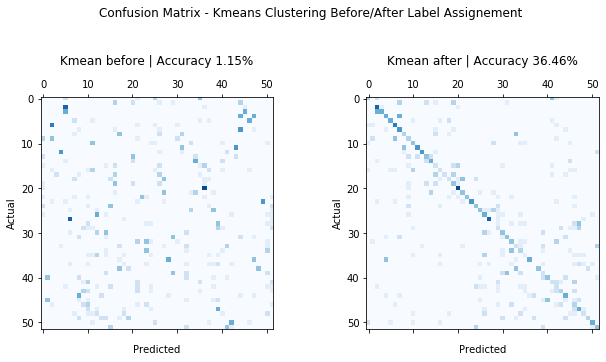

In [61]:
# Confusion Matrix

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax1.matshow(cm_norm_before_hung, cmap = 'Blues', vmin=0, vmax=1)
ax1.set_ylabel('Actual')
ax1.set_xlabel('\nPredicted')
ax1.set_title('Kmean before | Accuracy ' + str(np.round(acc_before_hung, 2)) + '%\n')

ax2.matshow(cm_norm, cmap = 'Blues', vmin=0, vmax=1)
ax2.set_ylabel('Actual')
ax2.set_xlabel('\nPredicted')
ax2.set_title('Kmean after | Accuracy ' + str(np.round(acc_clusters_kmean[0], 2)) + '%\n')

plt.suptitle('Confusion Matrix - Kmeans Clustering Before/After Label Assignement')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

plt.savefig(fig_res + '//Confusion Matrix Kmeans & Labeling.png', dpi=100)
plt.show()